# Read IVUS images

In [1]:
import SimpleITK as sitk
import glob
import os
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import numpy as np

In [2]:
def im2arr(x):
    return sitk.GetArrayFromImage(sitk.ReadImage(x))

In [3]:
datadir= "data"
files = sorted(glob.glob(datadir+"/*.mha"))

In [4]:
im = im2arr(files[0])  #im becomes a numpy array
im.shape

(3970, 256, 256)

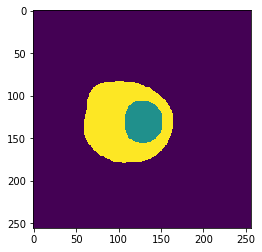

In [5]:
plt.imshow(im[2380])

In [6]:
def sample_stack(stack, rows=5, cols=5, start_with=10, show_every=3):
    fig,ax = plt.subplots(rows,cols,figsize=[12,12])
    for i in range(rows*cols):
        ind = start_with + i*show_every
        ax[int(i/rows),int(i % rows)].set_title('slice %d' % ind)
        ax[int(i/rows),int(i % rows)].imshow(stack[ind])
        ax[int(i/rows),int(i % rows)].axis('off')
    plt.show()

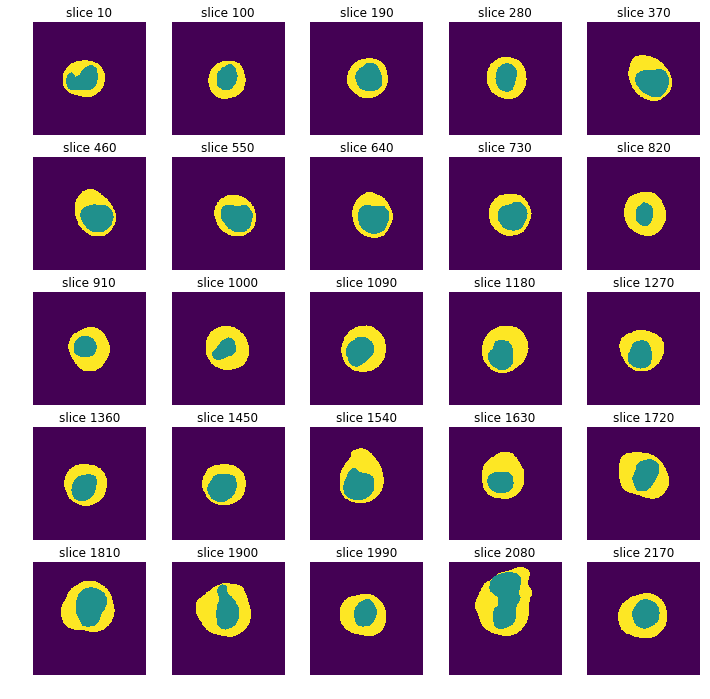

In [7]:
imstack = im2arr(files[0])
sample_stack(imstack, show_every=90)

# Ecentricity

In [8]:
im.shape

(3970, 256, 256)

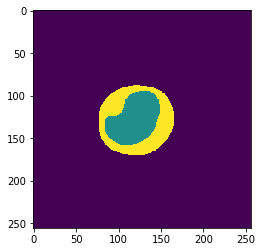

In [9]:
frame = im[0]
plt.imshow(frame)

In [10]:
unique, counts = np.unique(frame, return_counts=True)
>>> dict(zip(unique, counts))

{0: 59682, 1: 2829, 2: 3025}

In [78]:
frame8 = cv2.convertScaleAbs(frame,alpha=(255.0/2.0))
ret, thresh = cv2.threshold(frame8, 129, 255, 0)
frame8.dtype

dtype('uint8')

In [138]:
framergb = cv2.cvtColor(frame8,cv2.COLOR_GRAY2RGB)
#frame8rgb = cv2.convertScaleAbs(framergb)


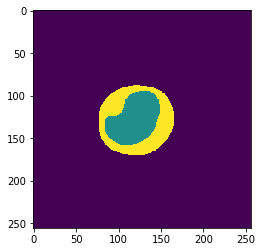

In [80]:
plt.imshow(frame8)

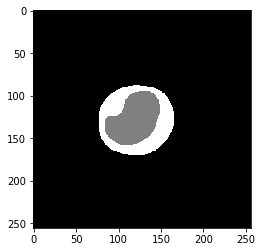

In [139]:
plt.imshow(framergb)

In [82]:
unique, counts = np.unique(framergb, return_counts=True)
>>> dict(zip(unique, counts))

{0: 179046, 128: 8487, 255: 9075}

In [126]:
im2, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)

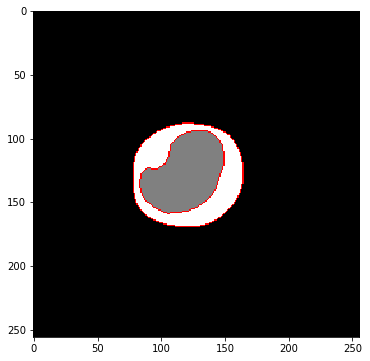

In [84]:
im3 = cv2.drawContours(framergb, contours, -1, (255,0,0), 1)
plt.figure(figsize=[6,6])
plt.imshow(im3)

In [128]:
parent = [ x[-1] for x in hierarchy[0] ]
index = np.where(np.array(parent) == 0)[0][0]
lumen_cont = contours[index]

array([[[123,  95]],

       [[124,  94]],

       [[125,  94]],

       [[126,  94]],

       [[127,  94]],

       [[128,  94]],

       [[129,  94]],

       [[130,  94]],

       [[131,  94]],

       [[132,  94]],

       [[133,  94]],

       [[134,  94]],

       [[135,  94]],

       [[136,  94]],

       [[137,  95]],

       [[138,  95]],

       [[139,  96]],

       [[140,  96]],

       [[141,  97]],

       [[142,  98]],

       [[143,  99]],

       [[144, 100]],

       [[145, 101]],

       [[146, 102]],

       [[146, 103]],

       [[147, 104]],

       [[148, 105]],

       [[148, 106]],

       [[148, 107]],

       [[148, 108]],

       [[148, 109]],

       [[149, 110]],

       [[149, 111]],

       [[149, 112]],

       [[149, 113]],

       [[149, 114]],

       [[149, 115]],

       [[149, 116]],

       [[149, 117]],

       [[149, 118]],

       [[149, 119]],

       [[149, 120]],

       [[149, 121]],

       [[148, 122]],

       [[148, 123]],

       [[1

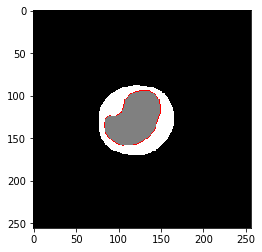

In [130]:
plt.imshow(cv2.drawContours(framergb, lumen_cont, -1, (255,0,0), 1))

In [134]:
cv2.contourArea(lumen_cont)

2922.0

In [155]:
(x, y), (minaxis, maxaxis), angle = cv2.fitEllipse(lumen_cont)
ellipse = cv2.fitEllipse(lumen_cont)

In [150]:
im3 = framergb.copy()

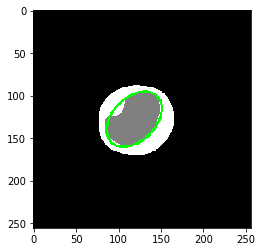

In [152]:
plt.imshow(cv2.ellipse(im3,ellipse,(0,255,0),2))

In [158]:
print(minaxis,maxaxis)

50.585662841796875 76.45760345458984


54.83401107788086 84.93942260742188


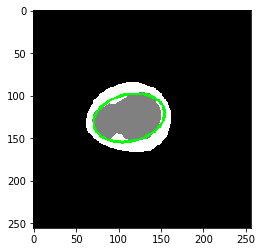

In [215]:
i= 9
frame = im[i]
#plt.imshow(frame)
frame8 = cv2.convertScaleAbs(frame,alpha=(255.0/2.0))
#plt.imshow(frame8)
ret, thresh = cv2.threshold(frame8, 129, 255, 0)
framergb = cv2.cvtColor(frame8,cv2.COLOR_GRAY2RGB)
#plt.imshow(framergb)
im2, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
parent = [ x[-1] for x in hierarchy[0] ]
index = np.where(np.array(parent) == 0)[0][0]
lumen_cont = contours[index]
#plt.imshow(cv2.drawContours(framergb, lumen_cont, -1, (255,0,0), 1))
(x, y), (minaxis, maxaxis), angle = cv2.fitEllipse(lumen_cont)
ellipse = cv2.fitEllipse(lumen_cont)
im3 = framergb.copy()
plt.imshow(cv2.ellipse(im3,ellipse,(0,255,0),2))
print(minaxis,maxaxis)

In [219]:
def draweclipse(imstack,i):
    frame = imstack[i]
    #plt.imshow(frame)
    frame8 = cv2.convertScaleAbs(frame,alpha=(255.0/2.0))
    #plt.imshow(frame8)
    ret, thresh = cv2.threshold(frame8, 129, 255, 0)
    framergb = cv2.cvtColor(frame8,cv2.COLOR_GRAY2RGB)
    #plt.imshow(framergb)
    im2, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
    parent = [ x[-1] for x in hierarchy[0] ]
    try:
        index = np.where(np.array(parent) == 0)[0][0]
        lumen_cont = contours[index]
        #plt.imshow(cv2.drawContours(framergb, lumen_cont, -1, (255,0,0), 1))
        (x, y), (minaxis, maxaxis), angle = cv2.fitEllipse(lumen_cont)
        ellipse = cv2.fitEllipse(lumen_cont)
        im3 = framergb.copy()
        return cv2.ellipse(framergb,ellipse,(0,255,0),2)
    except:
        pass
    

In [207]:
def sample_stack2(stack, rows=5, cols=5, start_with=0, show_every=1):
    fig,ax = plt.subplots(rows,cols,figsize=[12,12])
    for i in range(rows*cols):
        ind = start_with + i*show_every
        print(start_with,i,show_every,ind)
        ax[int(i/rows),int(i % rows)].set_title('slice %d' % ind)
        ax[int(i/rows),int(i % rows)].imshow(draweclipse(stack,i))
        ax[int(i/rows),int(i % rows)].axis('off')
    plt.show()

In [194]:
imstack.shape

(3970, 256, 256)

0 0 1 0
0 1 1 1
0 2 1 2
0 3 1 3
0 4 1 4
0 5 1 5
0 6 1 6
0 7 1 7
0 8 1 8


TypeError: Image data cannot be converted to float

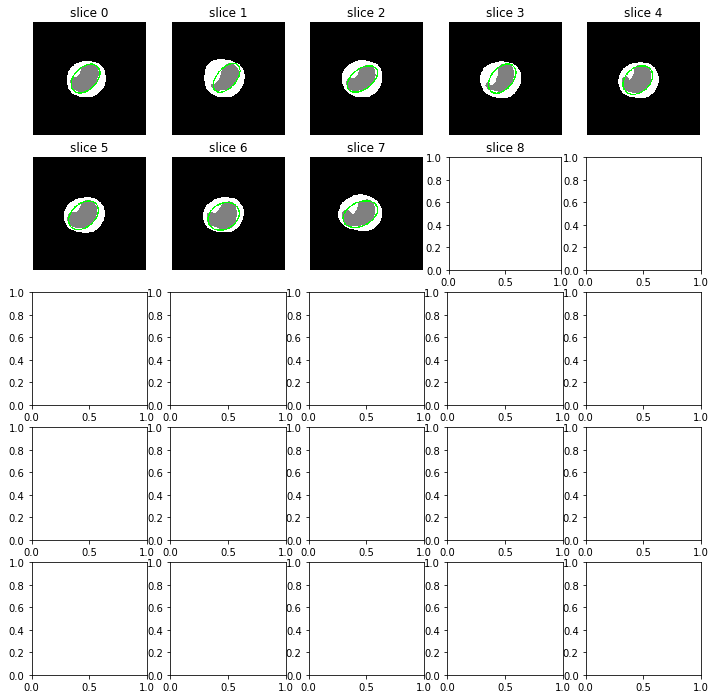

In [220]:
sample_stack2(imstack, show_every=1)